In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import log

plt.rcParams["figure.figsize"] = (20,10)


In [3]:
!ls

island-data-bottle-round-3 prices_33.csv
island-data-bottle-round-4 prices_41.csv
price_analysis.ipynb       prices_42.csv
prices_31.csv              prices_43.csv
prices_32.csv


In [71]:
price1 = pd.read_csv('prices_31.csv', sep = ';')
price2 = pd.read_csv('prices_32.csv', sep = ';')
price3 = pd.read_csv('prices_33.csv', sep = ';')
price4 = pd.read_csv('prices_41.csv', sep = ';')
price5 = pd.read_csv('prices_42.csv', sep = ';')
price6 = pd.read_csv('prices_43.csv', sep = ';')

In [72]:
trade1 = pd.read_csv('trades_round_3_day_0_wn.csv', sep=';')
trade2 = pd.read_csv('trades_round_3_day_1_wn.csv', sep = ';')
trade3 = pd.read_csv('trades_round_3_day_2_wn.csv', sep = ';')
trade4 = pd.read_csv('trades_round_4_day_1_wn.csv', sep = ';')
trade5 = pd.read_csv('trades_round_4_day_2_wn.csv', sep = ';')
trade6 = pd.read_csv('trades_round_4_day_3_wn.csv', sep = ';')


In [73]:
trade1.head()

,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,Paris,Camilla,BERRIES,SEASHELLS,4003.0,6
1,100,Paris,Camilla,PEARLS,SEASHELLS,10002.0,1
2,100,Camilla,Paris,DIVING_GEAR,SEASHELLS,99999.0,1
3,300,Charlie,Pablo,PEARLS,SEASHELLS,9998.0,2
4,300,Charlie,Paris,PEARLS,SEASHELLS,9998.0,1


In [74]:
#convert timestamp in each one to a float
price1['timestamp'] = price1['timestamp'].apply(lambda x: float(x))
price2['timestamp'] = price2['timestamp'].apply(lambda x: float(x))
price3['timestamp'] = price3['timestamp'].apply(lambda x: float(x))
price4['timestamp'] = price4['timestamp'].apply(lambda x: float(x))
price5['timestamp'] = price5['timestamp'].apply(lambda x: float(x))
price6['timestamp'] = price6['timestamp'].apply(lambda x: float(x))

price2['timestamp'] = price2['timestamp'] + price1['timestamp'].max() + 100
price3['timestamp'] = price3['timestamp'] + price2['timestamp'].max() + 100
price4['timestamp'] = price4['timestamp'] + price3['timestamp'].max() + 100
price5['timestamp'] = price5['timestamp'] + price4['timestamp'].max() + 100
price6['timestamp'] = price6['timestamp'] + price5['timestamp'].max() + 100


In [75]:
trade1['timestamp'] = trade1['timestamp'].apply(lambda x: float(x))
trade2['timestamp'] = trade2['timestamp'].apply(lambda x: float(x))
trade3['timestamp'] = trade3['timestamp'].apply(lambda x: float(x))
trade4['timestamp'] = trade4['timestamp'].apply(lambda x: float(x))
trade5['timestamp'] = trade5['timestamp'].apply(lambda x: float(x))
trade6['timestamp'] = trade6['timestamp'].apply(lambda x: float(x))

trade2['timestamp'] = trade2['timestamp'] + trade1['timestamp'].max() + 100
trade3['timestamp'] = trade3['timestamp'] + trade2['timestamp'].max() + 100
trade4['timestamp'] = trade4['timestamp'] + trade3['timestamp'].max() + 100
trade5['timestamp'] = trade5['timestamp'] + trade4['timestamp'].max() + 100
trade6['timestamp'] = trade6['timestamp'] + trade5['timestamp'].max() + 100

In [76]:
combined = pd.concat([price1, price2, price3, price4, price5, price6])
combined.head(15)

combined_trades = pd.concat([trade1, trade2, trade3, trade4, trade5, trade6])

## do the same for berries
berries = combined[combined["product"] == "BERRIES"].drop(columns = ["product"])


In [77]:

berries = berries.rename(columns={"mid_price": "berries_price"})
#drop columns that are not timestamp or price

berries = berries[["timestamp", "berries_price"]]

In [78]:
combined_trades.head()

,timestamp,buyer,seller,symbol,currency,price,quantity
0,0.0,Paris,Camilla,BERRIES,SEASHELLS,4003.0,6
1,100.0,Paris,Camilla,PEARLS,SEASHELLS,10002.0,1
2,100.0,Camilla,Paris,DIVING_GEAR,SEASHELLS,99999.0,1
3,300.0,Charlie,Pablo,PEARLS,SEASHELLS,9998.0,2
4,300.0,Charlie,Paris,PEARLS,SEASHELLS,9998.0,1


In [79]:
df = berries

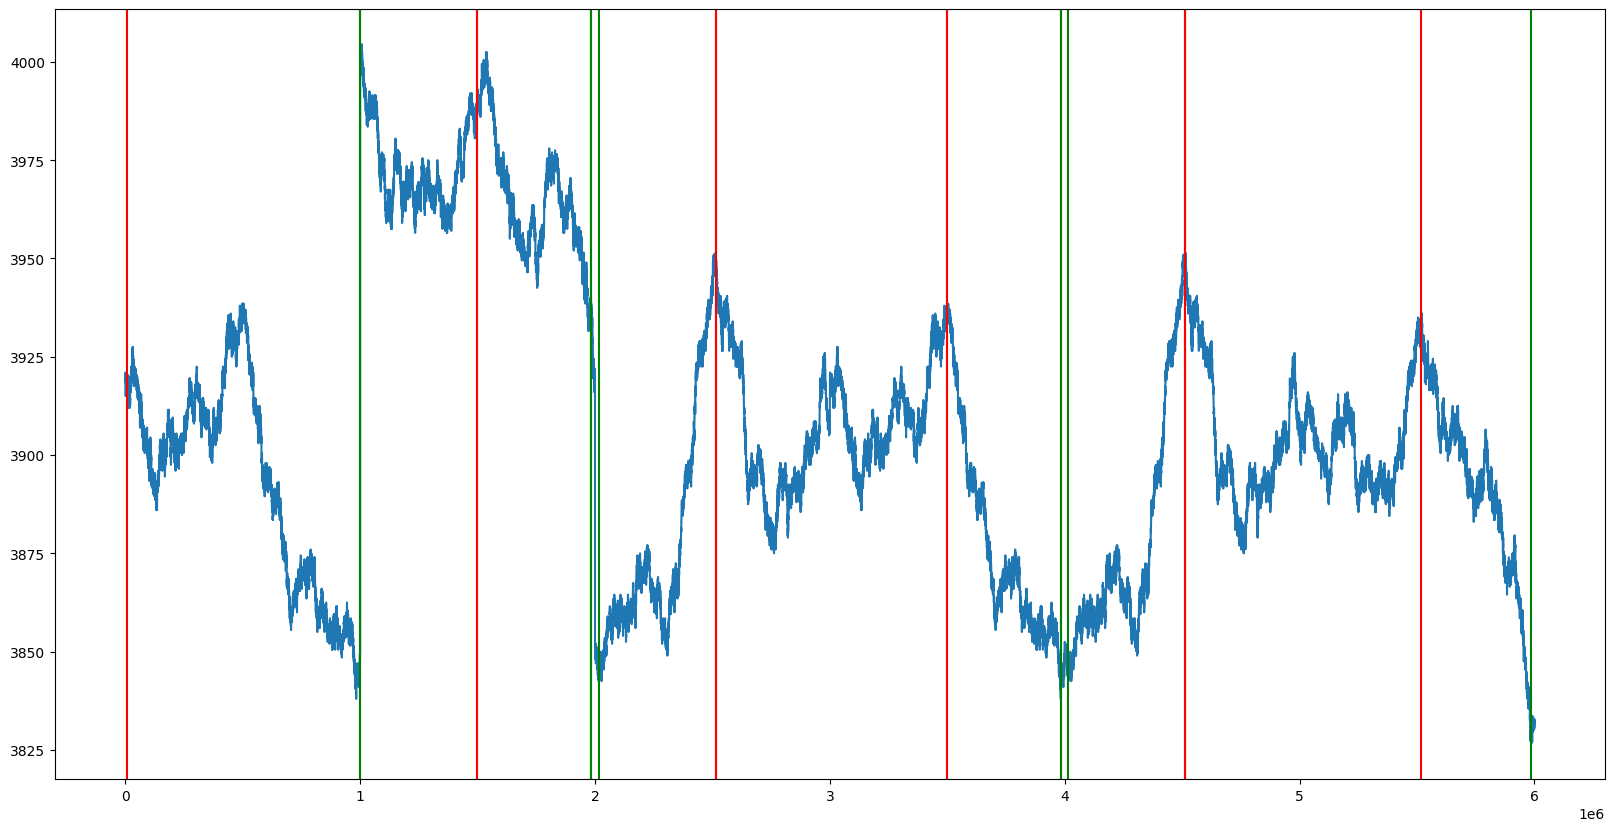

In [81]:
#graph the four prices vertically stacked
plt.plot(df['timestamp'], df['berries_price'])
# add vertical lines every integer from 0 to 6
#plt.vlines(range(0, 6000000, 1000000), 3800, 4100, colors='r', linestyles='dashed')
#plot a vertical line whenever olivia trades, red when sell and green when buy
for i in range(len(combined_trades)):
    if(combined_trades.iloc[i]['symbol'] == 'BERRIES'):
        if combined_trades.iloc[i]['buyer'] == 'Olivia':
            plt.axvline(combined_trades.iloc[i]['timestamp'], color = 'g')
        if combined_trades.iloc[i]['seller'] == 'Olivia':
            plt.axvline(combined_trades.iloc[i]['timestamp'], color = 'r')
        
    
plt.show()

## convert to 6 graphs, one for each day



In [59]:
#add a new column called that is 2*baguette + 4*dip + ukulele
df['basket_proxy'] = 2*df['baguette_price'] + 4*df['dip_price'] + df['ukulele_price']

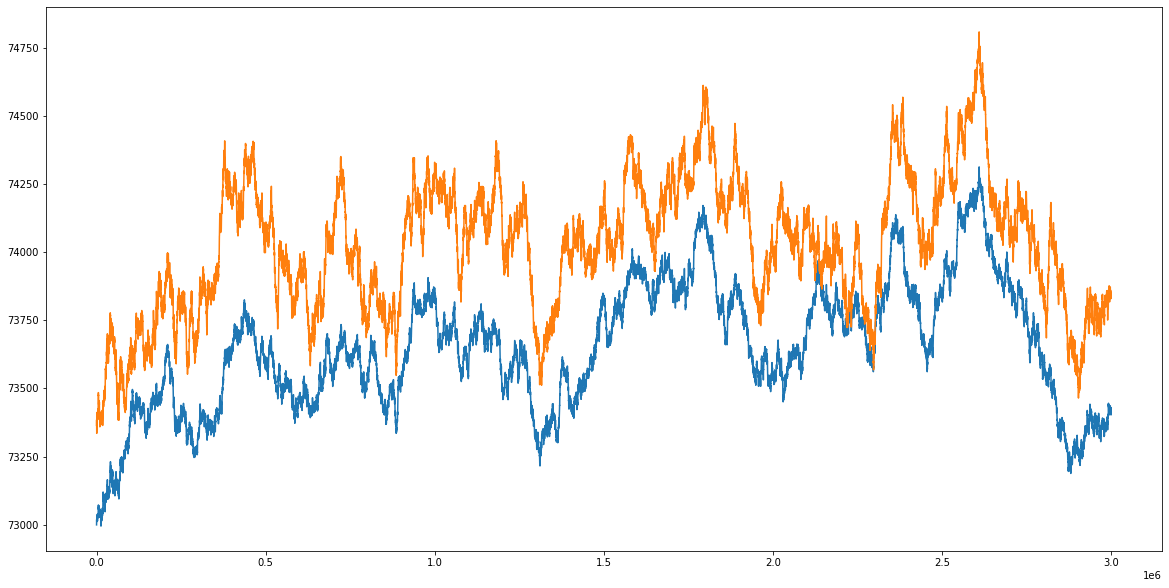

In [60]:
#plot basket proxy vs basket price as two lines with the same x and y axis
fig, ax = plt.subplots(1, 1)
ax.plot(df['timestamp'], df['basket_proxy'], label = 'basket proxy')
ax.plot(df['timestamp'], df['basket_price'], label = 'basket price')

In [61]:
#add a column called difference that is the difference between basket price and basket proxy
df['difference'] = df['basket_price'] - df['basket_proxy']

Text(0.5, 1.0, 'Difference between Basket Price and Basket Proxy')

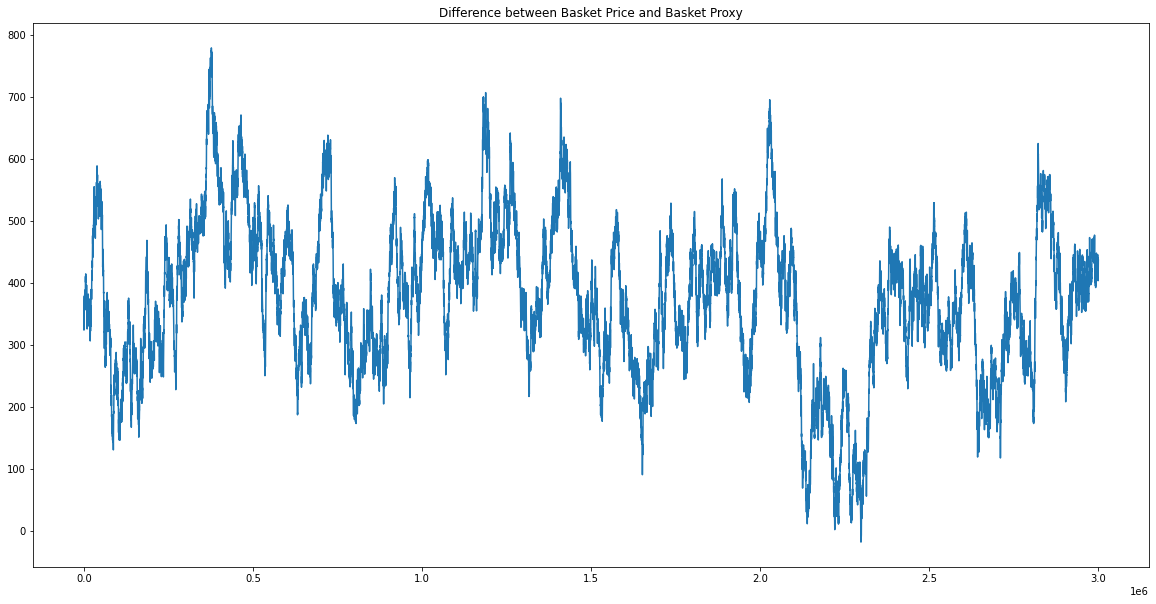

In [62]:
#plot the difference
fig, ax = plt.subplots(1, 1)
ax.plot(df['timestamp'], df['difference'])
ax.set_title('Difference between Basket Price and Basket Proxy')

In [63]:
#add a column called logratio that is the log of (basket price / basket proxy)
df['ratio'] = df['basket_price'] / df['basket_proxy']
df['logratio'] = df['ratio'].apply(lambda x: log(x))
logAvg = df['logratio'].mean()
logStd = df['logratio'].std()

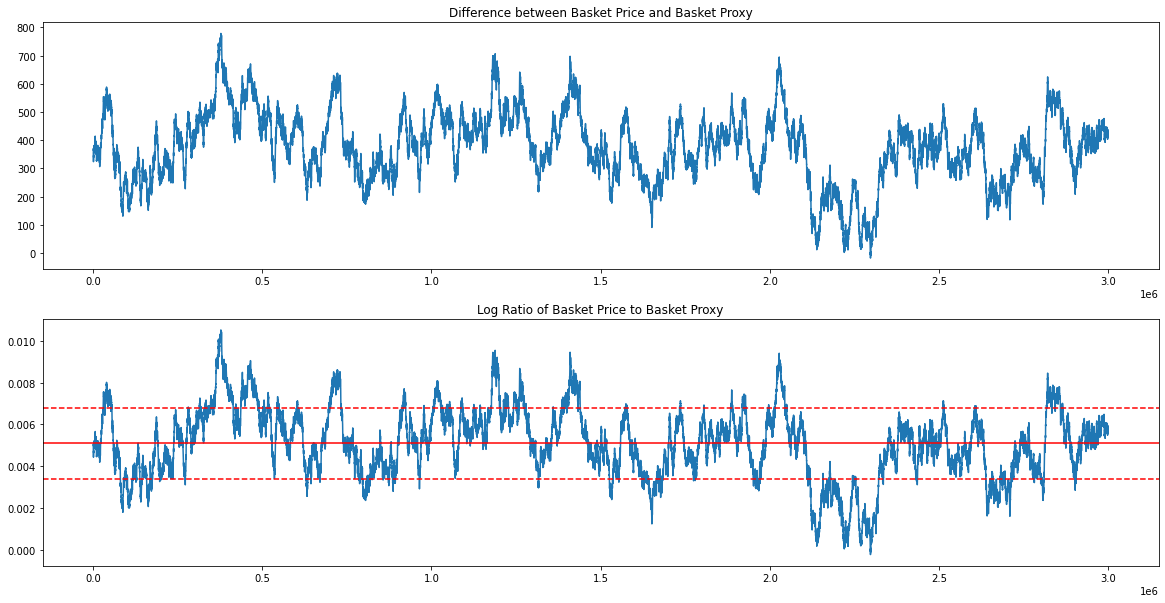

In [64]:
#plot spread and logratio vertically stacked
fig, ax = plt.subplots(2, 1)
ax[0].plot(df['timestamp'], df['difference'])
ax[0].set_title('Difference between Basket Price and Basket Proxy')
ax[1].plot(df['timestamp'], df['logratio'])
ax[1].set_title('Log Ratio of Basket Price to Basket Proxy')
#plot a horizontal line at the mean of logratio, and a line at the mean plus one standard deviation and one standard deviation below
ax[1].axhline(y = logAvg, color = 'r', linestyle = '-')
ax[1].axhline(y = logAvg + logStd, color = 'r', linestyle = '--')
ax[1].axhline(y = logAvg - logStd, color = 'r', linestyle = '--')

In [65]:
#read the csv file called log.txt
logg = pd.read_csv('log.txt', sep = ';')
#do the exact same thing as above, but with the log file instead of the price file

In [66]:
logBaguette = logg[logg["product"] == "BAGUETTE"].drop(columns = ["product"])
logDip = logg[logg["product"] == "DIP"].drop(columns = ["product"])
logUkulele = logg[logg["product"] == "UKULELE"].drop(columns = ["product"])
logBasket = logg[logg["product"] == "PICNIC_BASKET"].drop(columns = ["product"])

In [67]:
logDip = logDip.rename(columns={"mid_price": "dip_price"})
logBaguette = logBaguette.rename(columns={"mid_price": "baguette_price"})
logUkulele = logUkulele.rename(columns={"mid_price": "ukulele_price"})
logBasket = logBasket.rename(columns={"mid_price": "basket_price"})
#drop columns that are not timestamp or price
logDip = logDip[["timestamp", "dip_price"]]
logBaguette = logBaguette[["timestamp", "baguette_price"]]
logUkulele = logUkulele[["timestamp", "ukulele_price"]]
logBasket = logBasket[["timestamp", "basket_price"]]


In [68]:
logDf = pd.merge(logDip, logBaguette, on = "timestamp")
logDf = pd.merge(logDf, logUkulele, on = "timestamp")
logDf = pd.merge(logDf, logBasket, on = "timestamp")
logDf.head()


,timestamp,dip_price,baguette_price,ukulele_price,basket_price
0,0,7021.0,12382.0,20697.5,74002.5
1,100,7020.0,12386.0,20696.0,73989.5
2,200,7019.0,12384.0,20696.5,74008.0
3,300,7018.0,12386.0,20697.0,74012.0
4,400,7019.5,12389.0,20696.5,74021.0


In [69]:
#calculate the basket proxy
logDf['basket_proxy'] = 2*logDf['baguette_price'] + 4*logDf['dip_price'] + logDf['ukulele_price']

In [70]:
#calculate the difference between basket price and basket proxy
logDf['difference'] = logDf['basket_price'] - logDf['basket_proxy']

In [72]:
#calculate the log ratio of basket price to basket proxy
logDf['ratio'] = logDf['basket_price'] / logDf['basket_proxy']
logDf['logratio'] = logDf['ratio'].apply(lambda x: log(x))

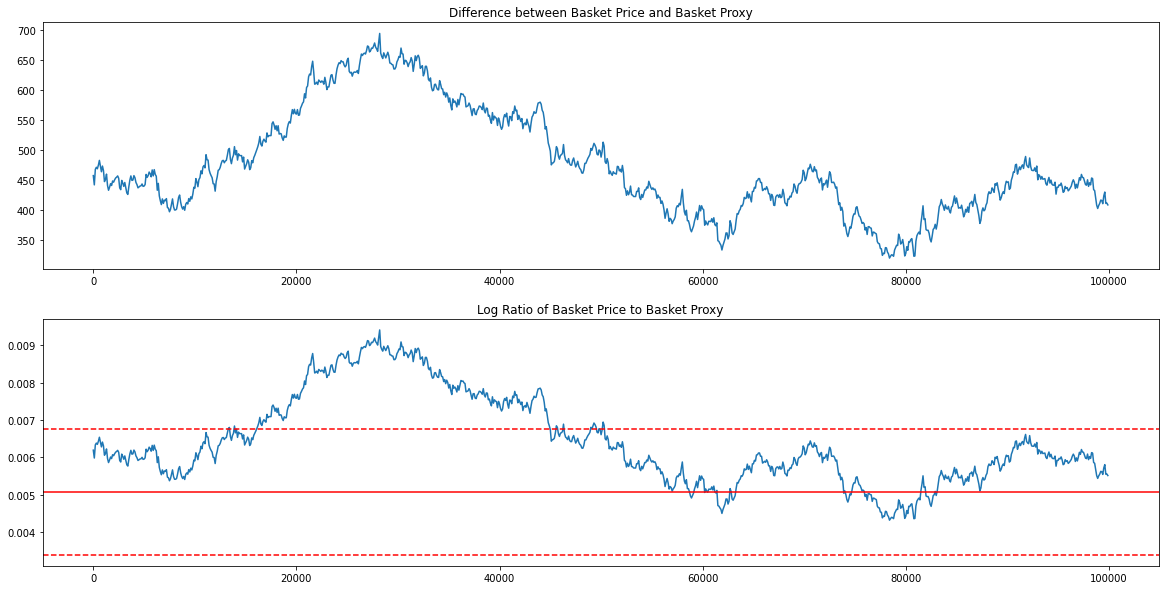

In [73]:
#plot stacked graphs of difference and logratio
fig, ax = plt.subplots(2, 1)
ax[0].plot(logDf['timestamp'], logDf['difference'])
ax[0].set_title('Difference between Basket Price and Basket Proxy')
ax[1].plot(logDf['timestamp'], logDf['logratio'])
ax[1].set_title('Log Ratio of Basket Price to Basket Proxy')
#plot the same horizontal lines as above
ax[1].axhline(y = logAvg, color = 'r', linestyle = '-')
ax[1].axhline(y = logAvg + logStd, color = 'r', linestyle = '--')
ax[1].axhline(y = logAvg - logStd, color = 'r', linestyle = '--')


In [74]:
#print the mean and standard deviation of logratio
print(logAvg)
print(logStd)

0.005088082667016638
0.0016822947277079987
